<a href="https://colab.research.google.com/github/AlanGarcia2003/IntelifenciaArtificial_y_Redes_Neuronales/blob/main/Actividades/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ALAN GIOVANNI GARCIA OSORIO    2109282 CLASE:N1

# **Actividad 6: Redes neuronales.**

**Entrenamiento de Red Neuronal Convolucional.**



In [38]:
#1. Cargar librerias
import tensorflow  as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [39]:
#2. Cargar datos
 (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

In [40]:
#3. Procesamiento de datos
train_images.shape

(60000, 28, 28)

In [41]:
len(train_labels)

60000

In [42]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

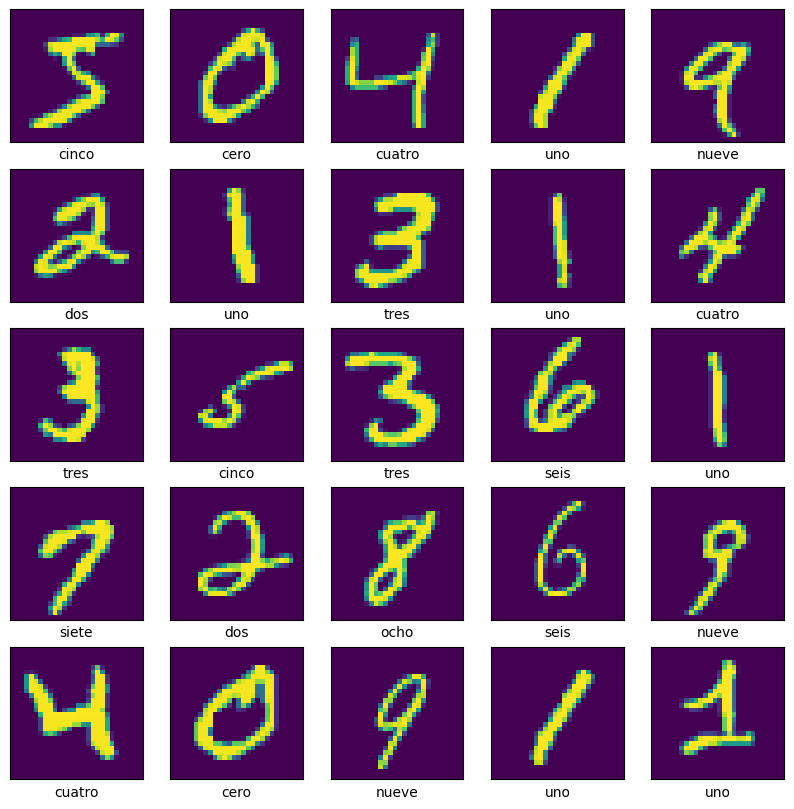

In [43]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 5574

In [45]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [46]:
#4. Selección y entrenamiento del modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 69s 36ms/step - loss: 0.1521 - accuracy: 0.9524 - val_loss: 0.0503 - val_accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0472 - accuracy: 0.9850 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 3/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0277 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0359 - val_accuracy: 0.9899
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0251 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0172 - accuracy: 0.9947 - val_loss: 0.0323 - val_accuracy: 0.9904
Epoch 7/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0303 - val_accura

313/313 - 2s - loss: 0.0370 - accuracy: 0.9913 - 2s/epoch - 8ms/step


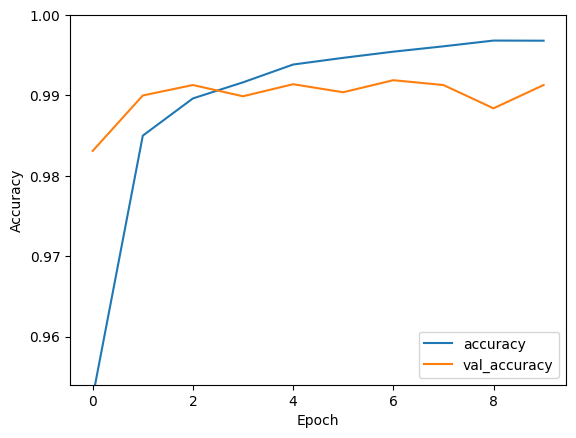

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.954, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [48]:
print(test_acc)

0.9912999868392944


In [49]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [50]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 3s 9ms/step


In [51]:
predictions[0]

array([0.08533674, 0.08533675, 0.08533674, 0.08533676, 0.08533677,
       0.08533674, 0.08533674, 0.23196921, 0.08533674, 0.08533676],
      dtype=float32)

In [52]:
predictions = model.predict(test_images)

for i in range(5):
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    print("Predicción:", predicted_label.numpy(), "| Valor real:", true_label)

313/313 [==============================] - 3s 10ms/step
Predicción: 7 | Valor real: 7
Predicción: 2 | Valor real: 2
Predicción: 1 | Valor real: 1
Predicción: 0 | Valor real: 0
Predicción: 4 | Valor real: 4


In [53]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

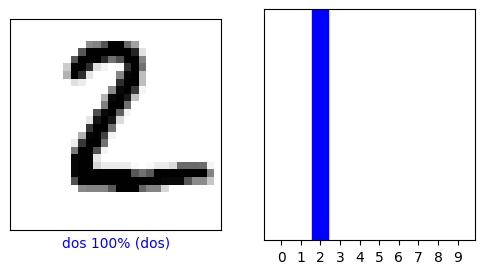

In [54]:
#5. Prueba de modelo
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

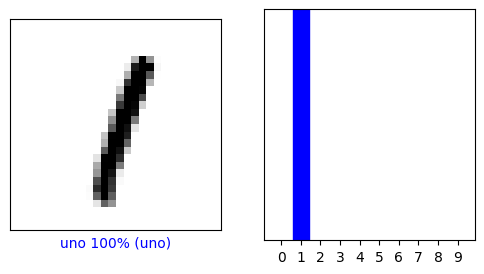

In [55]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

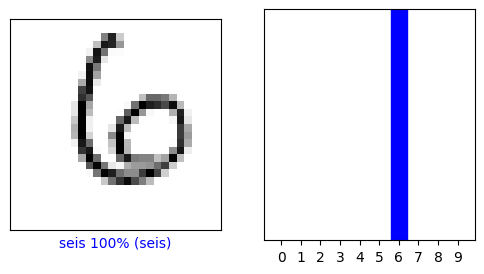

In [56]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

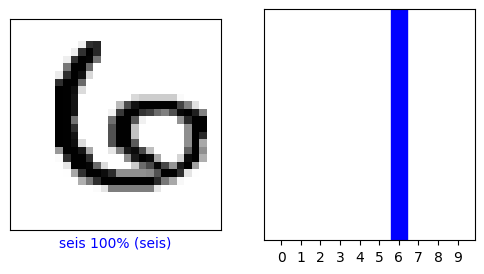

In [57]:
i = 54
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

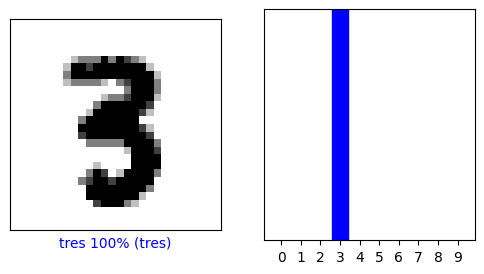

In [58]:
i = 68
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### ¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

10 epocas que fueron las mismas en comparacion de la actividad anterior pero teniendo menos error en esta prueba.





### ¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

Con este modelo ya que tuve una perdida muy minima a comparación de la actividad anterior que a pesar de ser baja, sigue siendo mas eficiente la forma convolucional.